# <center><b> Title: Strategic Investment in London's Airbnb Market: Identifying High-Potential Areas for Maximum Return-By A H Chowdhury</b></center>

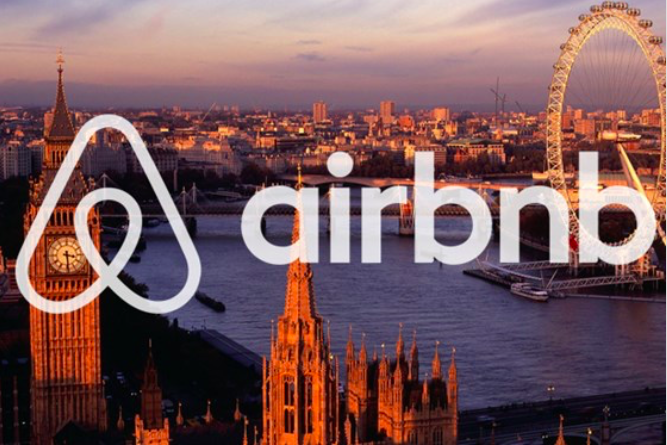

# About


Airbnb, founded in 2008, has revolutionized the hospitality industry by allowing individuals to rent out their homes or rooms to travellers. Over the years, it has grown into a global platform with millions of listings worldwide, including in major cities like London. In analyzing Airbnb's impact in London, we can examine three key datasets: listings, neighbourhoods, and reviews. The listings dataset contains 93,481 rows and 18 columns, offering detailed information about the properties available, such as pricing, location, and amenities. The neighbourhoods dataset is smaller, with 33 rows and 2 columns, likely capturing the geographic distribution and basic characteristics of London’s neighbourhoods. Finally, the reviews dataset is extensive, with 1,783,641 rows and 2 columns, providing a wealth of guest feedback that can be used to assess satisfaction and identify trends in guest experiences. By analysing these datasets together, we can gain valuable insights into the dynamics of the Airbnb market in London, including which areas are most popular, what factors drive guest satisfaction, and how Airbnb listings are distributed across the city.

# Introduction to Portfolios

As a dedicated and passionate Data Analyst, I have built a diverse portfolio showcasing my ability to work on real-world data projects, providing valuable insights and solving complex business problems. My portfolio demonstrates proficiency in data analysis tools like Python, R, SQL, and Tableau, and covers a wide range of projects from various industries.

One of my key projects, "Strategic Investment in London's Airbnb Market: Identifying High-Potential Areas for Maximum Return," leverages spatial data and predictive analytics to help investors make informed decisions about the best neighborhoods for Airbnb rentals. I have also worked on a predictive model for an online shopping platform, analyzing whether visitors are likely to make a purchase based on their behavior. Other notable projects include working with Netflix data to identify viewer trends, analyzing vehicle datasets for performance optimization, conducting an in-depth analysis of coronavirus data, and evaluating trends in mental health datasets.

Through these projects, I have developed a strong ability to clean and preprocess data, conduct exploratory data analysis (EDA), visualize trends, and draw actionable insights. My goal as a data analyst is to help businesses turn data into strategic decisions, continuously refining my skills while contributing to impactful solutions.

# Finding a Dataset

Link for London Airbnb Datasets: https://insideairbnb.com/london/

https://insideairbnb.com/get-the-data/
https://www.kaggle.com/datasets/arnavkulkarni/housing-prices-in-london

For this project, data was sourced from Inside Airbnb, a trusted platform that provides detailed and up-to-date information on Airbnb listings across various cities worldwide. The focus was on London, England, with the dataset specifically collected on June 14, 2024. The dataset offers valuable insights into the Airbnb landscape in London, encompassing a variety of key aspects such as listings, reviews, and neighbourhood characteristics (Cox, 2024).

To conduct a comprehensive analysis, four distinct CSV files were selected:

listings.csv: This file contains detailed information about each Airbnb listing in London. It includes attributes such as listing IDs, host details, property types, geographical coordinates, pricing, availability, and other crucial features that describe the properties available on the platform.

reviews.csv: The reviews dataset comprises all reviews left by guests for Airbnb listings in London. This file is essential for understanding guest experiences and sentiments. It includes the date of the review, the listing ID it pertains to, and the text of the review, among other details.

neighbourhoods.csv: This file provides geographical and demographic information about the different neighbourhoods in London where Airbnb listings are located. It includes the names of neighbourhoods and their respective geographical boundaries, which are useful for spatial analysis.

london.csv: The London.csv dataset contains house listings in London and nearby regions. It includes details such as Property Name, Price, House Type (e.g., House, Flat, Studio), Area in sq ft, Bedrooms, Bathrooms, Receptions, Location, City/County (e.g., London, Essex), and Postal Code.

These datasets were selected because they offer a comprehensive view of Airbnb activity in London, from the specifics of individual listings to the sentiments expressed by guests, and the broader context of the neighbourhoods in which these listings are situated.

The datasets were accessed and downloaded directly from the Inside Airbnb website under the London section for the date specified (June 14, 2024). The data provided by Inside Airbnb is well-documented and frequently updated, ensuring the reliability and relevance of the information used in this analysis (Cox, 2024).

# Ask a Question

# Read the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from datetime import datetime

<b>Load the data</b>

In [2]:
# Load the data

df_listings = pd.read_csv('listings.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods.csv')
df_reviews = pd.read_csv('reviews.csv')
df_london=pd.read_csv('London.csv')

<b>Using head() function to Display rows</b>

In [8]:
# Display  rows of listings dataframe to understand their structure
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41445,2 Double bed apartment in quiet area North London,180838,Sean,NaN,Barnet,51.61492,-0.25632,Entire home/apt,150.0,4,21,2024-06-07,0.14,1,175,2,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,53.0,1,42,2024-05-03,0.25,3,331,2,NaN
2,41509,Room in maisonette in chiswick,181028,Peter,NaN,Hounslow,51.49351,-0.25568,Private room,NaN,1,71,2019-12-23,0.45,1,0,0,NaN
3,41712,"Room with a view, shared flat, central Bankside",182322,Nina,NaN,Southwark,51.50191,-0.10204,Private room,89.0,2,127,2024-06-07,0.78,2,344,16,NaN
4,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,120.0,4,96,2024-04-28,0.54,1,163,2,NaN


In [9]:
# Display first 3 rows of neighbourhoods dataframe to understand their structure

df_neighbourhoods.head(3)

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley


In [10]:
# Display first 3 rows of reviews dataframe to understand their structure

df_reviews.head(3)

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13


In [11]:
df_london.head(3)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL


In [12]:
df_reviews.groupby('listing_id')['date'].size()

listing_id
13913                  42
15400                  96
17402                  56
24328                  94
33332                  19
                       ..
1175492582281991217     1
1176052110196947425     1
1176191335409436078     3
1176254946137659544     1
1176909312056710529     1
Name: date, Length: 68739, dtype: int64

<b>shape command</b> 

In [13]:
# Get the shape from df_listings shown rows and columns

df_listings.shape

(93481, 18)

In [14]:
df_neighbourhoods.shape

(33, 2)

In [15]:
df_reviews.shape

(1783641, 2)

In [16]:
df_london.shape

(3480, 11)

<b>info() command</b>

In [17]:
# Get info about each DataFrame

print("\nListings DataFrame Info:\n")
df_listings.info()


Listings DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93475 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           61422 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_

In [18]:
print("\nNeighbourhoods DataFrame Info:\n")
df_neighbourhoods.info()


Neighbourhoods DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


In [19]:
print("\nReviews DataFrame Info:\n")
df_reviews.info()


Reviews DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783641 entries, 0 to 1783640
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
dtypes: int64(1), object(1)
memory usage: 27.2+ MB


In [20]:
df_reviews.date=pd.to_datetime(df_reviews.date)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783641 entries, 0 to 1783640
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.2 MB


In [21]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [22]:
df_reviews.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


<b>describe() command</b>

In [23]:
# Get a statistical summary of the numerical columns
df_listings.describe() 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,9.348100e+04,9.348100e+04,0.0,93481.000000,93481.000000,61422.000000,93481.000000,93481.000000,68739.000000,93481.000000,93481.000000,93481.000000,0.0
mean,4.928322e+17,1.790005e+08,NaN,51.509504,-0.126792,209.973527,5.459152,19.080252,0.987175,14.967416,124.253217,5.708133,NaN
std,4.848127e+17,1.872951e+08,NaN,0.048997,0.100710,961.421059,22.894163,45.767345,1.310568,49.553939,127.745091,12.072526,NaN
min,1.391300e+04,2.594000e+03,NaN,51.295937,-0.497800,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.537258e+07,2.386688e+07,NaN,51.483090,-0.189290,78.000000,1.000000,0.000000,0.160000,1.000000,0.000000,0.000000,NaN
50%,6.231232e+17,9.221023e+07,NaN,51.513697,-0.125940,138.000000,2.000000,4.000000,0.520000,2.000000,81.000000,1.000000,NaN
75%,9.754280e+17,3.141630e+08,NaN,51.539533,-0.067210,227.000000,4.000000,18.000000,1.260000,6.000000,243.000000,6.000000,NaN
max,1.178199e+18,5.831673e+08,NaN,51.681642,0.295731,80000.000000,1125.000000,1678.000000,44.680000,441.000000,365.000000,402.000000,NaN


In [24]:
df_neighbourhoods.describe() 

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [25]:
df_reviews.describe() 

,listing_id,date
count,1.783641e+06,1783641
mean,2.053618e+17,2021-05-02 23:47:39.445595136
min,1.391300e+04,2009-12-21 00:00:00
25%,1.324400e+07,2019-03-10 00:00:00
50%,2.848892e+07,2022-07-02 00:00:00
75%,5.440201e+17,2023-08-09 00:00:00
max,1.176909e+18,2024-06-17 00:00:00
std,3.631287e+17,NaN


In [26]:
df_listings['room_type'].value_counts()

room_type
Entire home/apt    59190
Private room       33645
Shared room          452
Hotel room           194
Name: count, dtype: int64

# Pre-Processing & Exploratory Data Analysis (EDA)


# Clean the Data

<b>Listings DataFrame</b>

In [27]:
# Display basic information about each DataFrame
print("Listings DataFrame Info:")
df_listings.info()

Listings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93475 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           61422 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_re

In [308]:
# drop the empty column such as 'neighbourhood_group','license'
df_listings=df_listings.drop(columns=['neighbourhood_group','license'],axis=1)
#df_listings=df_listings.drop(['neighbourhood_group','license'] axis=1 , inplace=True)
print("Listings DataFrame after removed all the empty column:\n")
df_listings.info()

Listings DataFrame after removed all the empty column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93475 non-null  object 
 4   neighbourhood                   93481 non-null  object 
 5   latitude                        93481 non-null  float64
 6   longitude                       93481 non-null  float64
 7   room_type                       93481 non-null  object 
 8   price                           61422 non-null  float64
 9   minimum_nights                  93481 non-null  int64  
 10  number_of_reviews               93481 non-null  int64  
 11  last_review                     68739

In [28]:
# df_listings dataframe have some missing values col such as host_name, price,last_review , reviews_per_month replace with relevent data
df_listings['price']=df_listings['price'].fillna(0)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93475 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           93481 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_review                     

In [29]:
df_listings['host_name']=df_listings['host_name'].fillna('Unknown')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93481 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           93481 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_review                     

In [30]:


# Fill missing values in 'Date' column with the current date
current_date = pd.Timestamp(datetime.now().date())

df_listings['last_review']=df_listings['last_review'].fillna('current_date')
df_listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93481 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           93481 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  
 12  last_review                     

In [31]:
"""
from datetime import datetime
date_listings_last_review=datetime('last_review')
# Convert to different format
formated_date_listings_last_review=date_listings_last_review.strftime('%d-%m-%Y')
df_listings['last_review']=pd.to_datetime(df_listings['last_review'])
df_listings.info()

"""


"\nfrom datetime import datetime\ndate_listings_last_review=datetime('last_review')\n# Convert to different format\nformated_date_listings_last_review=date_listings_last_review.strftime('%d-%m-%Y')\ndf_listings['last_review']=pd.to_datetime(df_listings['last_review'])\ndf_listings.info()\n\n"

In [32]:
# Also change the data Type from object to date

#df_listings['last_review']=pd.to_datetime(df_listings['last_review'])
#df_listings.info()


In [33]:
df_listings['reviews_per_month']=df_listings['reviews_per_month'].fillna(0)


In [34]:
# After remove all the null values the listings DataFrame as below:
print('\n Cleaned Listings DataFrame Info: \n')
df_listings.info()


 Cleaned Listings DataFrame Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93481 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           93481 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non-null  int64  


In [35]:
print("Listings DataFrame Shape shown Row and Column:\n")
df_listings.shape


Listings DataFrame Shape shown Row and Column:



(93481, 18)

In [36]:
# Handle and remove any duplicates values
print("After remove Duplicate Listings DataFrame Shape shown Row and Column:\n")
df_listings = df_listings.drop_duplicates()
df_listings.shape

After remove Duplicate Listings DataFrame Shape shown Row and Column:



(93481, 18)

In [37]:
# isnull command showing how many missing values with each col
df_listings.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               93481
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           93481
dtype: int64

In [38]:
df_london.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

In [39]:
df_london['Location']=df_london['Location'].fillna(0)
df_london.isnull().sum()

Unnamed: 0           0
Property Name        0
Price                0
House Type           0
Area in sq ft        0
No. of Bedrooms      0
No. of Bathrooms     0
No. of Receptions    0
Location             0
City/County          0
Postal Code          0
dtype: int64

In [40]:
df_london.shape

(3480, 11)

In [41]:
df_london=df_london.drop_duplicates()
df_london.shape

(3480, 11)

In [42]:
df_london.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


<b>Neighbourhoods DataFrame</b>

In [43]:
# Neighbourhoods table information 
df_neighbourhoods.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


In [44]:
df_neighbourhoods.shape

(33, 2)

In [45]:
# Remove the unwanted column as neighbourhood_group is null.
df_neighbourhoods=df_neighbourhoods.drop('neighbourhood_group',axis=1)
df_neighbourhoods

,neighbourhood
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,City of London
7,Croydon
8,Ealing
9,Enfield


In [46]:
# isnull command showing how many missing values with each col
df_neighbourhoods.isnull().sum()

neighbourhood    0
dtype: int64

In [47]:
# Handle and remove any duplicates values
df_neighbourhoods = df_neighbourhoods.drop_duplicates()

In [48]:
# After get rid of neighbourhood_group as it was null values.
print("\nCleaned Neighbourhoods DataFrame Info:\n")
df_neighbourhoods.info()


Cleaned Neighbourhoods DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  33 non-null     object
dtypes: object(1)
memory usage: 396.0+ bytes


In [50]:
print("\nCleaned Neighbourhoods DataFrame Info:\n")
df_neighbourhoods.info()


Cleaned Neighbourhoods DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  33 non-null     object
dtypes: object(1)
memory usage: 396.0+ bytes


In [51]:
# After remove one Column as it was null values
df_neighbourhoods.shape

(33, 1)

<b>Reviews DataFrame</b>

In [73]:
print("\nReviews DataFrame info:")
df_reviews.info()



Reviews DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 1772183 entries, 0 to 1783640
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.6 MB


In [53]:
df_reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

In [54]:
# Handle and remove any duplicates values
df_reviews = df_reviews.drop_duplicates()
df_reviews.shape

(1772183, 2)

In [72]:

# Inspect reviews data info() how many null values in the column

print("\nCleaned Reviews DataFrame info:")
df_reviews.info




Cleaned Reviews DataFrame info:


<bound method DataFrame.info of                   listing_id       date
0                      13913 2010-08-18
1                      13913 2011-07-11
2                      13913 2011-09-13
3                      13913 2011-10-03
4                      13913 2011-10-09
...                      ...        ...
1783636  1176191335409436078 2024-06-14
1783637  1176191335409436078 2024-06-15
1783638  1176254946137659544 2024-06-14
1783639  1176052110196947425 2024-06-13
1783640  1176909312056710529 2024-06-12

[1772183 rows x 2 columns]>

In [74]:
print("\nCleaned London DataFrame info:")
df_london.info()



Cleaned London DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           3480 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


# Store in SQLite

In [56]:

# Connect to SQLite database (it will create the database file if it doesn't exist)
conn_listins = sqlite3.connect('listings.db')
conn_neighbourhoods = sqlite3.connect('neighbourhoods.db')
conn_reviews = sqlite3.connect('reviews.db')

# Store the DataFrame in a table called 'listings, neighbourhoods, reviews'
df_listings.to_sql('listings', conn_listins, if_exists='replace', index=False)
df_neighbourhoods.to_sql('neighbourhoods', conn_neighbourhoods, if_exists='replace', index=False)
df_reviews.to_sql('reviews', conn_reviews, if_exists='replace', index=False)

# Verify that the data is stored correctly by reading it back
query_listings="""
SELECT * 
FROM listings;
"""
df_stored_listings = pd.read_sql(query_listings , conn_listins)
print(df_stored_listings.head())

query_neighbourhoods ="""
SELECT * 
FROM neighbourhoods;
"""
df_stored_neighbourhoods = pd.read_sql(query_neighbourhoods , conn_neighbourhoods)
print(df_stored_neighbourhoods.head())

query_reviews="""
SELECT * 
FROM reviews;
"""
df_stored_reviews = pd.read_sql(query_reviews , conn_reviews)
print(df_stored_reviews.head())



      id                                               name  host_id  \
0  41445  2 Double bed apartment in quiet area North London   180838   
1  13913                Holiday London DB Room Let-on going    54730   
2  41509                     Room in maisonette in chiswick   181028   
3  41712  Room with a view, shared flat,  central  Bankside   182322   
4  15400                Bright Chelsea  Apartment. Chelsea!    60302   

  host_name neighbourhood_group           neighbourhood  latitude  longitude  \
0      Sean                None                  Barnet  51.61492   -0.25632   
1     Alina                None               Islington  51.56861   -0.11270   
2     Peter                None                Hounslow  51.49351   -0.25568   
3      Nina                None               Southwark  51.50191   -0.10204   
4  Philippa                None  Kensington and Chelsea  51.48780   -0.16813   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire 

In [57]:
print('\nAfter store the listings data in Store DataFrame:\n')

df_stored_listings.info()


After store the listings data in Store DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              93481 non-null  int64  
 1   name                            93481 non-null  object 
 2   host_id                         93481 non-null  int64  
 3   host_name                       93481 non-null  object 
 4   neighbourhood_group             0 non-null      object 
 5   neighbourhood                   93481 non-null  object 
 6   latitude                        93481 non-null  float64
 7   longitude                       93481 non-null  float64
 8   room_type                       93481 non-null  object 
 9   price                           93481 non-null  float64
 10  minimum_nights                  93481 non-null  int64  
 11  number_of_reviews               93481 non

In [58]:
print('\nAfter store the Neighbourhoods data in Store DataFrame:\n')
df_stored_neighbourhoods


After store the Neighbourhoods data in Store DataFrame:



,neighbourhood
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,City of London
7,Croydon
8,Ealing
9,Enfield


In [59]:
print('\nAfter store the reviews data in Store DataFrame:\n')

df_stored_reviews


After store the reviews data in Store DataFrame:



,listing_id,date
0,13913,2010-08-18 00:00:00
1,13913,2011-07-11 00:00:00
2,13913,2011-09-13 00:00:00
3,13913,2011-10-03 00:00:00
4,13913,2011-10-09 00:00:00
...,...,...
1772178,1176191335409436078,2024-06-14 00:00:00
1772179,1176191335409436078,2024-06-15 00:00:00
1772180,1176254946137659544,2024-06-14 00:00:00
1772181,1176052110196947425,2024-06-13 00:00:00


In [60]:
df_london.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


In [70]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1772183 entries, 0 to 1783640
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.6 MB


# Data Analysis & Visualization

In [61]:
#df_listings.columns.tolist()
df_stored_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [62]:
df_stored_neighbourhoods.columns

Index(['neighbourhood'], dtype='object')

In [63]:
df_stored_reviews.columns

Index(['listing_id', 'date'], dtype='object')

In [64]:
df_london.columns

Index(['Unnamed: 0', 'Property Name', 'Price', 'House Type', 'Area in sq ft',
       'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Location',
       'City/County', 'Postal Code'],
      dtype='object')

In [65]:
df_london.head(5)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [66]:
# Assuming df_stored_listings, df_stored_neighbourhoods, and df_stored_reviews are the DataFrames loaded from CSV files.

# Step 1: Join df_stored_listings with df_stored_neighbourhoods on 'neighbourhood'
df_listings_neighbourhoods = pd.merge(df_stored_listings, df_stored_neighbourhoods, on='neighbourhood', how='left')

# Step 2: Join the result with df_stored_reviews on 'id' (from listings) and 'listing_id' (from reviews)
df_listings_neighbourhoods_reviews = pd.merge(df_listings_neighbourhoods, df_stored_reviews, left_on='id', right_on='listing_id', how='left')

# Display the first few rows of the final combined DataFrame
print(df_listings_neighbourhoods_reviews.head())


      id                                               name  host_id  \
0  41445  2 Double bed apartment in quiet area North London   180838   
1  41445  2 Double bed apartment in quiet area North London   180838   
2  41445  2 Double bed apartment in quiet area North London   180838   
3  41445  2 Double bed apartment in quiet area North London   180838   
4  41445  2 Double bed apartment in quiet area North London   180838   

  host_name neighbourhood_group neighbourhood  latitude  longitude  \
0      Sean                None        Barnet  51.61492   -0.25632   
1      Sean                None        Barnet  51.61492   -0.25632   
2      Sean                None        Barnet  51.61492   -0.25632   
3      Sean                None        Barnet  51.61492   -0.25632   
4      Sean                None        Barnet  51.61492   -0.25632   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  150.0               4                 21  2024-06-

In [67]:
# Total row and col
df_listings_neighbourhoods_reviews.shape

(1796925, 20)

In [68]:
df_listings_neighbourhoods_reviews.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'listing_id',
       'date'],
      dtype='object')

### Descriptive Statistics

In [69]:
# Getting an overview of our data with descriptive statistics
# Summary statistics for numerical columns

print(df_listings_neighbourhoods_reviews.describe())

# Summary statistics for categorical columns
df_listings_neighbourhoods_reviews.describe(include=['object'])


                 id       host_id      latitude     longitude         price  \
count  1.796925e+06  1.796925e+06  1.796925e+06  1.796925e+06  1.796925e+06   
mean   2.121082e+17  1.231002e+08  5.150906e+01 -1.341770e-01  1.329535e+02   
std    3.694017e+17  1.501870e+08  4.425140e-02  9.322408e-02  9.602837e+02   
min    1.391300e+04  2.594000e+03  5.129594e+01 -4.978000e-01  0.000000e+00   
25%    1.327348e+07  1.348187e+07  5.148682e+01 -1.889466e-01  3.900000e+01   
50%    2.857424e+07  5.129816e+07  5.151310e+01 -1.293200e-01  8.000000e+01   
75%    5.642411e+17  1.830888e+08  5.153445e+01 -7.720000e-02  1.560000e+02   
max    1.178199e+18  5.831673e+08  5.168164e+01  2.957307e-01  8.000000e+04   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    1.796925e+06       1.796925e+06       1.796925e+06   
mean     3.837306e+00       1.233152e+02       2.152885e+00   
std      1.891733e+01       1.500823e+02       2.337741e+00   
min      1.000000e+00       0.000000

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license,date
count,1796925,1796925,0,1796925,1796925,1796925,0,1772183
unique,90034,15964,0,33,4,3221,0,4887
top,Double Garden View room - London House Hotel***,James,NaN,Westminster,Entire home/apt,2024-06-09,NaN,2024-05-12 00:00:00
freq,2026,17790,NaN,233602,923016,90281,NaN,3823


### Distribution of Room Types
Understand the distribution of different room types. Different room types in a dataset, showing how frequently each room type appears as a percentage of the total.

In [240]:
#colors = ['red', 'green', 'blue']
#room_type_counts = df_listings_neighbourhoods_reviews['room_type'].value_counts()
#print(room_type_counts)

# Plotting the distribution
#room_type_counts.plot(kind='bar', title='Distribution of Room Types', color=colors)


room_type
Entire home/apt    63.317680
Private room       35.991271
Shared room         0.483521
Hotel room          0.207529
Name: count, dtype: float64


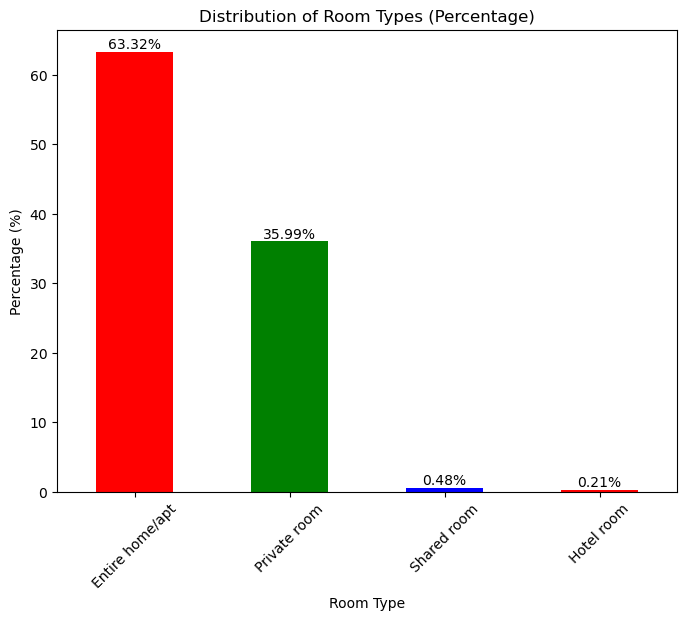

In [341]:
# Merge Listings and Neighbourhoods
df_listings_neighbourhoods_reviews = pd.merge(df_listings, df_neighbourhoods, on='neighbourhood', how='left')

# Calculate room type counts
room_type_counts = df_listings['room_type'].value_counts()

# Calculate the percentage for each room type
room_type_percentage = (room_type_counts / room_type_counts.sum()) * 100
print(room_type_percentage)

# Plotting the distribution
colors = ['red', 'green', 'blue']  # Adjust colors to match the number of room types
ax = room_type_percentage.plot(kind='bar', color=colors, title='Distribution of Room Types (Percentage)', figsize=(8, 6))

# Adding labels for the percentage values on each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f'{i.get_height():.2f}%', ha='center', fontsize=10)

# Add axis labels
plt.xlabel('Room Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
# Show the plot
plt.show()


### Number of Reviews by Room Type
To visualize the number of reviews for different room types, use a boxplot.

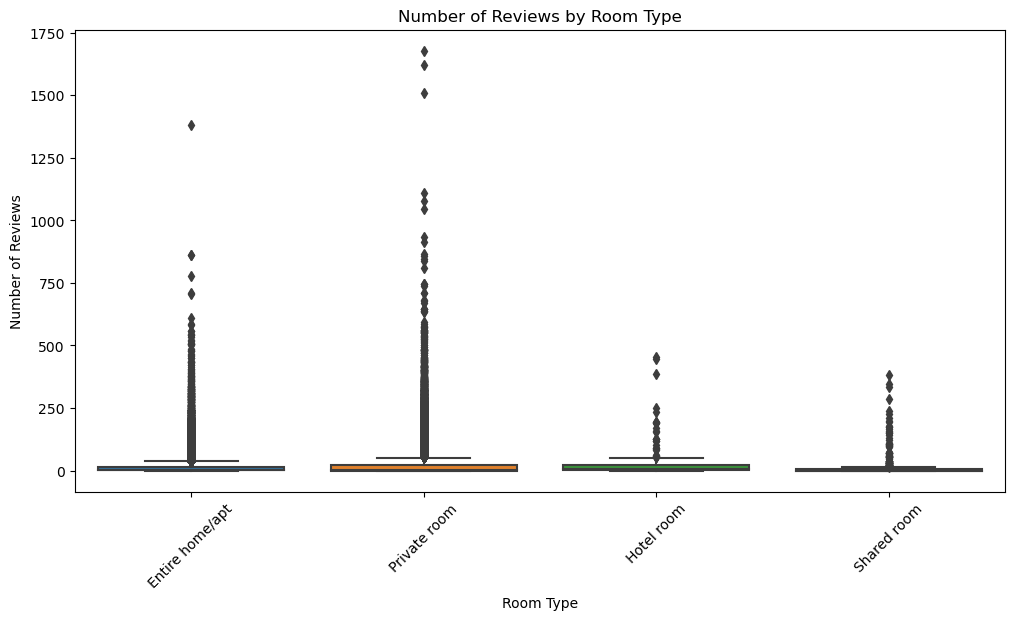

In [342]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='number_of_reviews', data=df_listings_neighbourhoods_reviews)
plt.title('Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


### Price by Room Type
To visualize how prices differ by room type, use a boxplot.

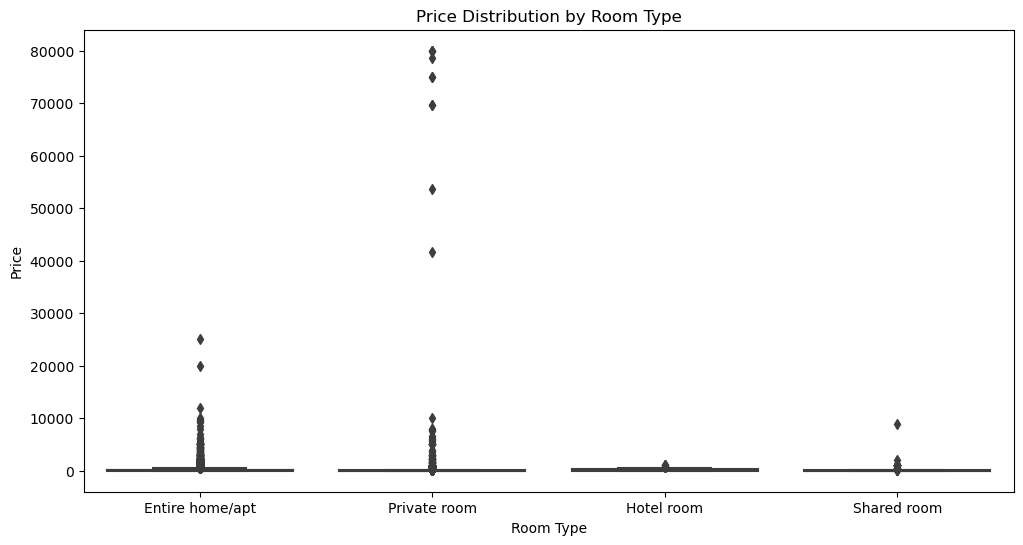

In [243]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df_listings_neighbourhoods_reviews)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


### Price vs. Minimum Night Stay
To explore the relationship between price and minimum night stay, use a scatter plot.

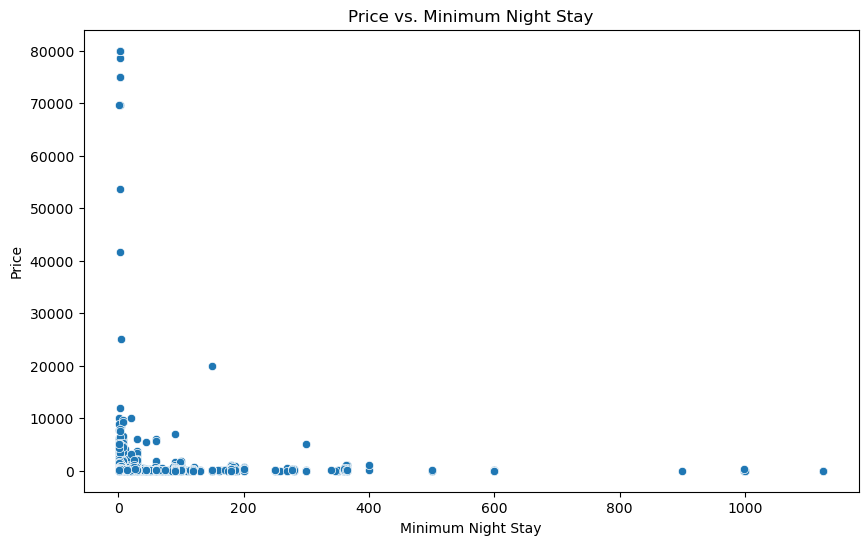

In [276]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df_listings_neighbourhoods_reviews)


plt.title('Price vs. Minimum Night Stay')
plt.xlabel('Minimum Night Stay')
plt.ylabel('Price')
plt.show()


<b>Top 5 minimum night count</b>

minimum_nights
1    30111
2    22019
3    16543
5     5938
4     5871
Name: count, dtype: int64


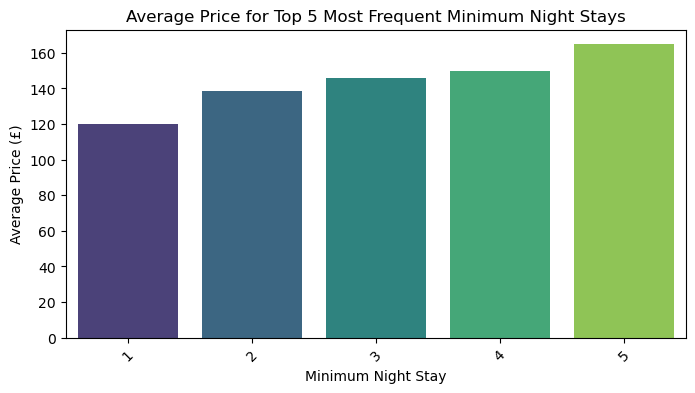

In [343]:
# Top 5 minimum_nights values
top5_minimum_night = df_listings_neighbourhoods_reviews['minimum_nights'].value_counts().head(5)
print(top5_minimum_night)

top5_data = df_listings_neighbourhoods_reviews[df_listings_neighbourhoods_reviews['minimum_nights'].isin(top5_minimum_night.index)]

# Average price for each minimum_night value
avg_price_for_min_nights = top5_data.groupby('minimum_nights')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_for_min_nights.index, y=avg_price_for_min_nights.values, palette="viridis")

plt.title('Average Price for Top 5 Most Frequent Minimum Night Stays')
plt.xlabel('Minimum Night Stay')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()


<b>Short term Rental VS Longer term Rental</b>

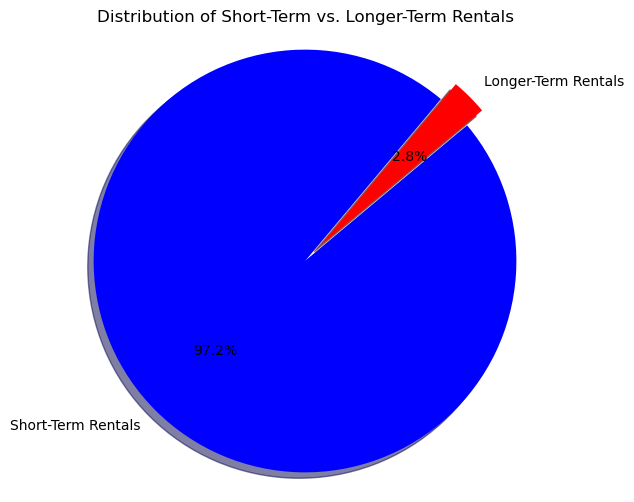

In [77]:

# Data for the pie chart
labels = ['Short-Term Rentals', 'Longer-Term Rentals']
sizes = [97.2, 2.8]  # Percentages
colors = ['blue', 'red']  # Colors for the segments
explode = (0.1, 0)  # "explode" the short-term rentals segment

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Distribution of Short-Term vs. Longer-Term Rentals')

# pie drow  a circle.
plt.axis('equal')  

plt.show()


### Average Price by Neighbourhood
Calculate the average price of listings in each neighbourhood.

In [78]:
colors = ['red', 'green', 'blue'] 
avg_price_by_neighbourhood = df_listings_neighbourhoods_reviews.groupby('neighbourhood')['price'].mean()
#print(avg_price_by_neighbourhood)

#avg_price_by_neighbourhood.plot(kind='bar', title='Average Price by Neighbourhood', figsize=(10,6), color=colors)


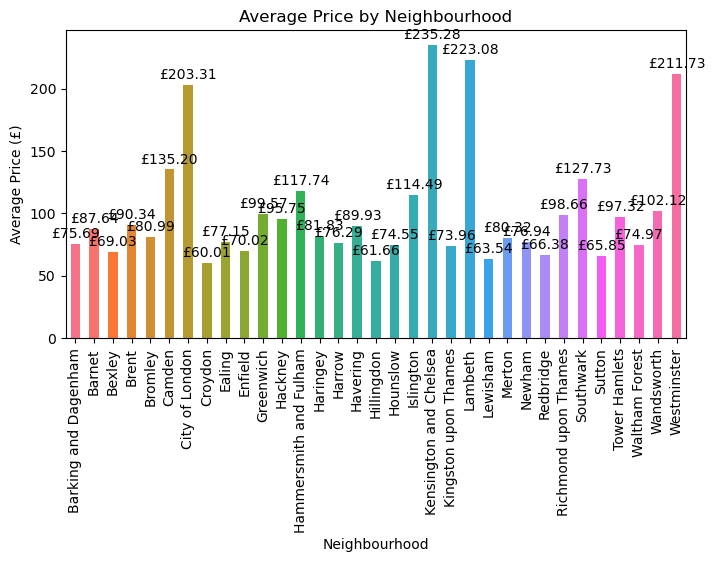

In [80]:
colors = sns.color_palette("husl", len(avg_price_by_neighbourhood))  # Using Seaborn's color palette for varied colors

# Aaverage price by neighbourhood
avg_price_by_neighbourhood = df_listings_neighbourhoods_reviews.groupby('neighbourhood')['price'].mean()

ax = avg_price_by_neighbourhood.plot(kind='bar', title='Average Price by Neighbourhood', figsize=(8, 4), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, f'£{i.get_height():.2f}', ha='center', fontsize=10)

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price (£)')

plt.show()


<b>Top 5 Neighbourhood according to Average price</b>

neighbourhood
Kensington and Chelsea    235.280122
Lambeth                   223.080422
Westminster               211.725345
City of London            203.305214
Camden                    135.201779
Name: price, dtype: float64


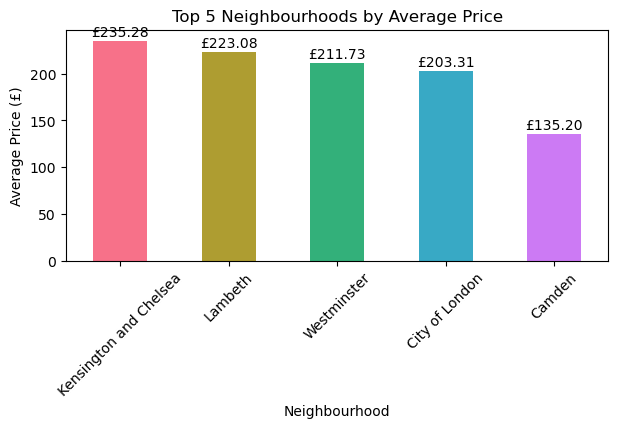

In [83]:
# Aaverage price by neighbourhood
avg_price_by_neighbourhood = df_listings_neighbourhoods_reviews.groupby('neighbourhood')['price'].mean()

top_5_avg_price_by_neighbourhood = avg_price_by_neighbourhood.sort_values(ascending=False).head(5)
print(top_5_avg_price_by_neighbourhood)

colors = sns.color_palette("husl", len(top_5_avg_price_by_neighbourhood))

ax = top_5_avg_price_by_neighbourhood.plot(kind='bar', title='Top 5 Neighbourhoods by Average Price', figsize=(7, 3), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, f'£{i.get_height():.2f}', ha='center', fontsize=10)

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price (£)')

plt.xticks(rotation=45)
plt.show()


In [84]:
df_london.head(1)

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY


Average house price by Location using London.csv data

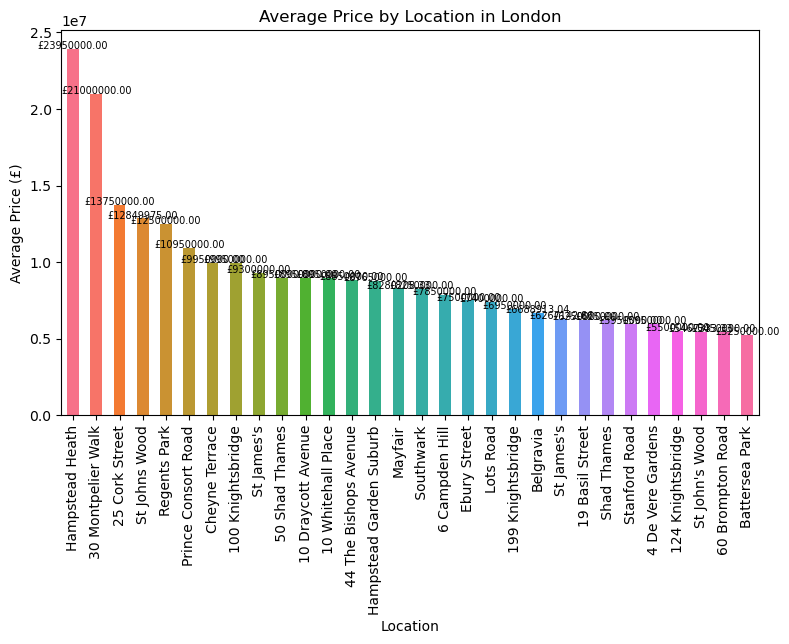

In [91]:

avg_london_house_price_by_locaion = df_london.groupby('Location')['Price'].mean().sort_values(ascending=False).head(30)

colors = sns.color_palette("husl", len(avg_london_house_price_by_locaion))  
ax = avg_london_house_price_by_locaion.plot(kind='bar', title='Average Price by Location in London', figsize=(9, 5), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, f'£{i.get_height():.2f}', ha='center', fontsize=7)

plt.xlabel('Location')
plt.ylabel('Average Price (£)')
plt.show()

<b>Top 5 House price According to Location in London</b>

Location
Hampstead Heath       23950000.0
30 Montpelier Walk    21000000.0
25 Cork Street        13750000.0
St Johns Wood         12849975.0
Regents Park          12500000.0
Name: Price, dtype: float64


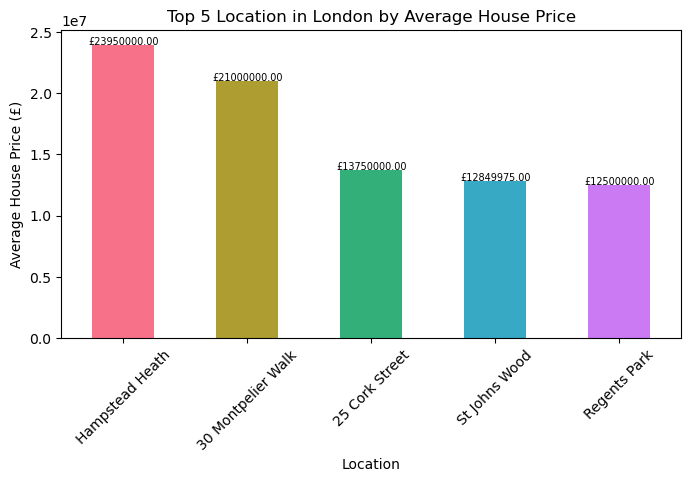

In [94]:
avg_london_house_price_by_locaion = df_london.groupby('Location')['Price'].mean()

top_5_avg_london_house_price_by_locaion = avg_london_house_price_by_locaion.sort_values(ascending=False).head(5)
print(top_5_avg_london_house_price_by_locaion)

colors = sns.color_palette("husl", len(top_5_avg_london_house_price_by_locaion))

ax = top_5_avg_london_house_price_by_locaion.plot(kind='bar', title='Top 5 Location in London by Average House Price', figsize=(8, 4), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 15, f'£{i.get_height():.2f}', ha='center', fontsize=7)

plt.xlabel('Location')
plt.ylabel('Average House Price (£)')
plt.xticks(rotation=45)

plt.show()

<b>5 Lower House Price area in London according to the Location</b>

Location
Streatham Hill    249999.0
Hackney Wick      299950.0
 Lewisham         300000.0
Livermere Road    300000.0
Newham            300000.0
Name: Price, dtype: float64


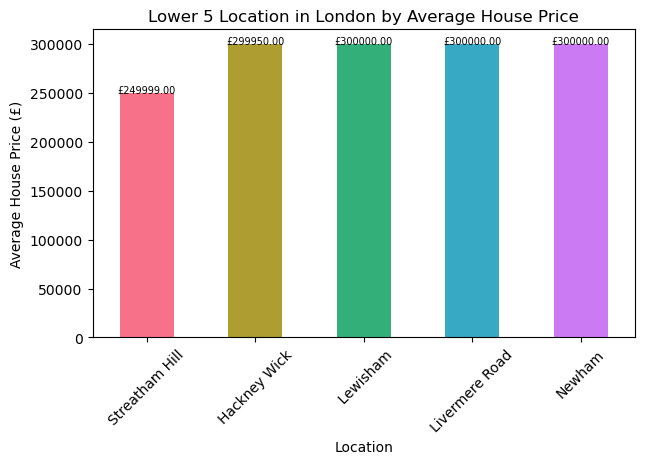

In [95]:
# Average price by Location
avg_london_house_price_by_locaion = df_london.groupby('Location')['Price'].mean()

# Sort by price in descending order and select the top 5
lower_5_avg_london_house_price_by_locaion = avg_london_house_price_by_locaion.sort_values(ascending=True).head(5)
print(lower_5_avg_london_house_price_by_locaion)

# Define a color palette for the top 5
colors = sns.color_palette("husl", len(lower_5_avg_london_house_price_by_locaion))

# Plotting the top 5 average prices
ax = lower_5_avg_london_house_price_by_locaion.plot(kind='bar', title='Lower 5 Location in London by Average House Price', figsize=(7, 4), color=colors)

# Adding labels for the average price values on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 15, f'£{i.get_height():.2f}', ha='center', fontsize=7)

# Add axis labels
plt.xlabel('Location')
plt.ylabel('Average House Price (£)')

plt.xticks(rotation=45)

# Display the plot
plt.show()

<b>Top 5 House Price according to the House Type</b>

House Type
Penthouse           3.112847e+06
House               2.388378e+06
New development     2.186312e+06
Mews                1.400000e+06
Flat / Apartment    1.251813e+06
Name: Price, dtype: float64


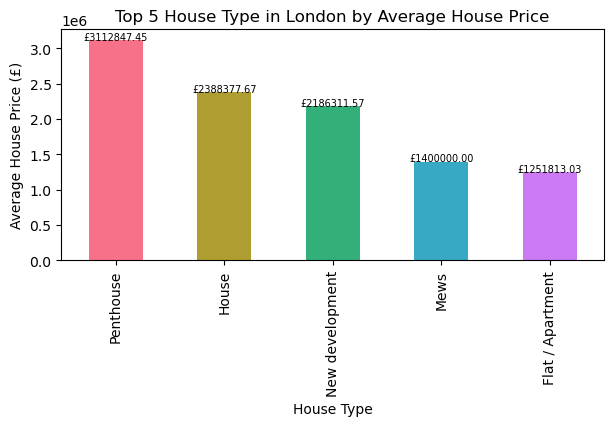

In [98]:
avg_london_house_price_by_HouseType = df_london.groupby('House Type')['Price'].mean()

top_5_avg_london_house_price_by_HouseType = avg_london_house_price_by_HouseType.sort_values(ascending=False).head(5)
print(top_5_avg_london_house_price_by_HouseType)

colors = sns.color_palette("husl", len(top_5_avg_london_house_price_by_HouseType))

ax = top_5_avg_london_house_price_by_HouseType.plot(kind='bar', title='Top 5 House Type in London by Average House Price', figsize=(7, 3), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, f'£{i.get_height():.2f}', ha='center', fontsize=7)

plt.xlabel('House Type')
plt.ylabel('Average House Price (£)')

plt.show()

<b>Average Price Per Minimum Night Distribution by Room Type</b>

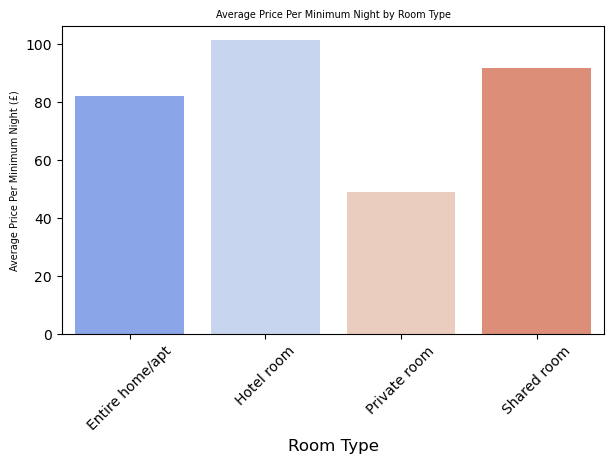

In [104]:
df_listings['price'] = pd.to_numeric(df_listings['price'], errors='coerce')
df_listings['minimum_nights'] = pd.to_numeric(df_listings['minimum_nights'], errors='coerce')

# Calculate price per minimum night
df_listings['price_per_min_night'] = df_listings['price'] / df_listings['minimum_nights']

# Drop any rows with NaN values in 'price_per_min_night' or 'room_type'
df_listings_clean = df_listings.dropna(subset=['price_per_min_night', 'room_type'])

# Calculate the average price per minimum night for each room type
avg_price_per_room = df_listings_clean.groupby('room_type')['price_per_min_night'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(7, 4))
sns.barplot(x='room_type', y='price_per_min_night', data=avg_price_per_room, palette="coolwarm")

# Add title and labels
plt.title('Average Price Per Minimum Night by Room Type', fontsize=7)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price Per Minimum Night (£)', fontsize=7)
plt.xticks(rotation=45)

# Show the plot
plt.show()



#### Heatmap of Prices and Number of Reviews by Neighbourhood
To visualize the relationship between price and number of reviews across neighborhoods

### Correlation Heatmap
To understand the correlations between numeric features such as price, minimum_night, number_of_reviews

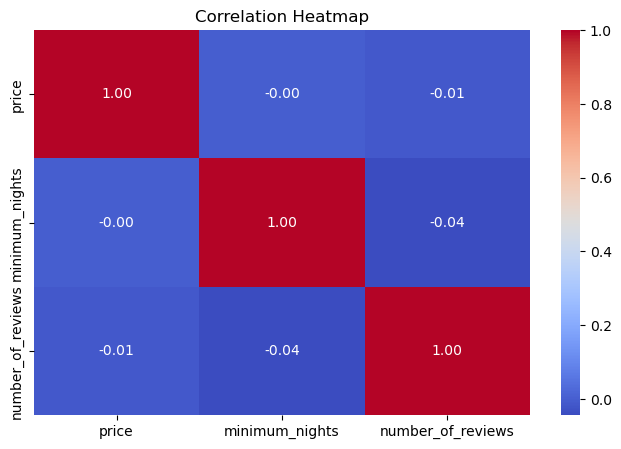

In [105]:
plt.figure(figsize=(8, 5))
correlation_matrix = df_listings_neighbourhoods_reviews[['price', 'minimum_nights', 'number_of_reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Availability Analysis
Explore how the availability of listings varies by neighbourhood or room type.

<Axes: title={'center': 'Average Availability by Neighbourhood'}, xlabel='neighbourhood'>

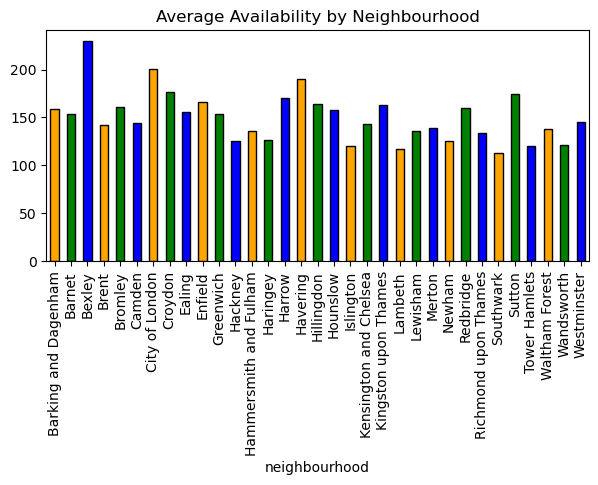

In [106]:
colors = ['orange', 'green', 'blue']
# Aver age availability by neighbourhood
avg_availability_by_neighbourhood = df_listings_neighbourhoods_reviews.groupby('neighbourhood')['availability_365'].mean()
#print(avg_availability_by_neighbourhood)

# Plotting the availability
avg_availability_by_neighbourhood.plot(kind='bar', title='Average Availability by Neighbourhood', figsize=(7,3),edgecolor='black', color=colors)


#### Top Hosts by Number of Listings
Find the hosts with the most listings.

host_name
James             17790
Alex              16330
David             12788
Paul              12611
Daniel            12575
Sarah             12409
Ben               10764
Michael           10124
Max And Billie     9759
Lisa               9110
Name: count, dtype: int64


<Axes: title={'center': '10 Top Hosts by Number of Listings'}, xlabel='host_name'>

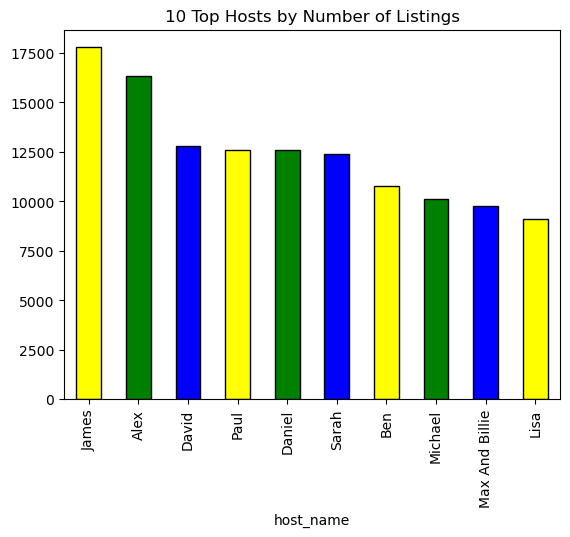

In [107]:
colors = ['yellow', 'green', 'blue']
top_hosts = df_listings_neighbourhoods_reviews['host_name'].value_counts().head(10)
print(top_hosts)

# Plotting the top hosts
top_hosts.plot(kind='bar', title='10 Top Hosts by Number of Listings',edgecolor='black', color=colors)
